In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
requests=pd.read_csv("data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['Unnamed: 0'], axis=1)
requests=requests.drop(['Unnamed: 0.1'], axis=1)
requests=requests.drop(['index'], axis=1)
requests=requests.drop(['hotel_id'],axis=1)
requests=requests.drop(['hotel_id.1'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
0,Morriott International,Corlton,amsterdam,1,1,0,366,14,10,austrian,0,laulau
1,Accar Hotels,Safitel,amsterdam,1,0,0,359,10,10,austrian,0,laulau
2,Yin Yang,Ardisson,amsterdam,1,1,0,193,10,10,austrian,0,laulau
3,Boss Western,Boss Western,amsterdam,0,0,0,205,4,10,austrian,0,laulau
4,Accar Hotels,Ibas,amsterdam,1,0,0,86,0,10,austrian,0,laulau


In [3]:
requests["group"]=pd.Categorical(requests["group"],ordered=False)
requests["parking"]=pd.Categorical(requests["parking"],ordered=False)
requests["pool"]=pd.Categorical(requests["pool"],ordered=False)
requests["brand"]=pd.Categorical(requests["brand"],ordered=False)
requests["children_policy"]=pd.Categorical(requests["children_policy"],ordered=False)
requests["language"]=pd.Categorical(requests["language"],ordered=False)
requests["mobile"]=pd.Categorical(requests["mobile"],ordered=False)
requests["city"]=pd.Categorical(requests["city"],ordered=False)
requests=requests.drop(['avatar_name'], axis=1)

In [4]:
#on transforme les catégories de string en catégories de nombres (on pourra faire les correspondances plus tard)
_, opt = np.unique(np.array(requests['group']), return_inverse=True)
requests['group']=opt
_, opt = np.unique(np.array(requests['brand']), return_inverse=True)
requests['brand']=opt
_, opt = np.unique(np.array(requests['city']), return_inverse=True)
requests['city']=opt
_, opt = np.unique(np.array(requests['language']), return_inverse=True)
requests['language']=opt
requests

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile
hotel_id,,,,,,,,,,,
0,4,4,0,1,1,0,366,14,10,0,0
1,0,14,0,1,0,0,359,10,10,0,0
2,5,1,0,1,1,0,193,10,10,0,0
3,1,2,0,0,0,0,205,4,10,0,0
4,0,6,0,1,0,0,86,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
625,5,13,0,1,0,0,268,11,10,0,1
778,3,7,0,1,0,0,120,0,10,0,1
567,3,7,0,1,0,0,101,1,10,0,1


In [5]:
price=requests["price"]
X_train,X_test,price_train,price_test=train_test_split(requests,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'], axis=1)
X_test=X_test.drop(['price'], axis=1)

In [6]:
X_train.head()
#X_test.head()

,group,brand,city,parking,pool,children_policy,stock,date,language,mobile
hotel_id,,,,,,,,,,
90830,4,10,7,0,0,1,38,15,19,0
79877,0,6,5,0,0,0,7,20,4,0
50928,0,9,3,0,0,0,33,20,16,1
32762,4,4,2,1,1,0,88,25,12,0
41117,2,15,3,0,1,1,14,15,2,0


In [7]:
X_train.shape

(74236, 10)

In [8]:
rf= RandomForestRegressor(n_estimators=400,max_features=2)
rfFit=rf.fit(X_train, price_train)
# Importance décroissante des variables
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : rfFit.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,brand,0.335563
6,stock,0.174764
0,group,0.155954
4,pool,0.139102
2,city,0.096843
7,date,0.051681
5,children_policy,0.022553
8,language,0.013563
3,parking,0.008873
9,mobile,0.001104


In [ ]:
#Fait planter mon ordinateur

param=[{"n_estimators":list(range(50,500,50)),"max_features":list(range(2,10,1)) }]
n_features = np.shape(X_train)[1]
rf= GridSearchCV(RandomForestRegressor(),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, price_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

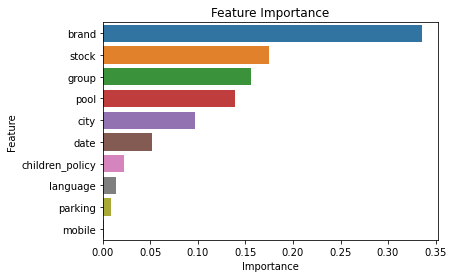

In [12]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(20), x='Importance', y='Feature');

In [9]:
#Calcul de la valeur absolue des erreurs
predictions = rf.predict(X_test)
print("MSE=",mean_squared_error(predictions,price_test))
print("R2=",r2_score(price_test,predictions))

MSE= 162.57741215078306
R2= 0.9722862058625115


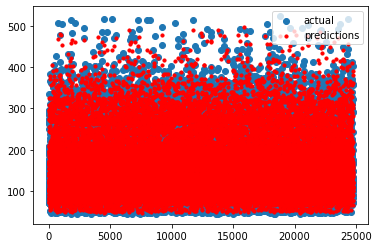

In [11]:
x = np.linspace(1,np.shape(price_test)[0],np.shape(price_test)[0])
plt.scatter(x,price_test,label='actual')
plt.scatter(x,predictions,s=10,c='red',label='predictions')
plt.legend()